<a href="https://colab.research.google.com/github/Syntax-code/Machine-Learning/blob/master/iris__Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle --upgrade
!kaggle --version
from google.colab import files
files.upload()

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kartikchourasiya","key":"807c8d14f49cd514a2015f84a2a567f1"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#chamge permission
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d uciml/iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 7.12MB/s]


In [4]:
!unzip iris.zip

Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


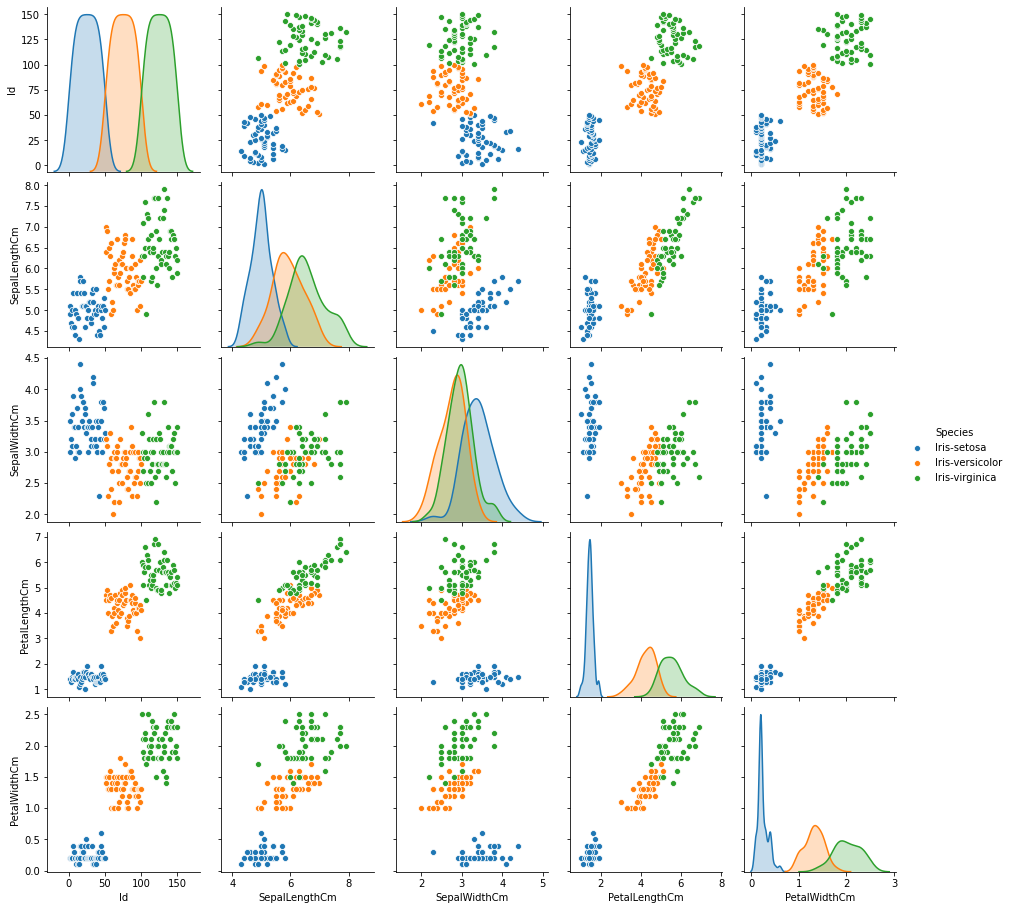

In [12]:
sns.pairplot(df, hue = 'Species')

In [13]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [24]:
final_df = df[df['Species'] != 'Iris-virginica']
final_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
final_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

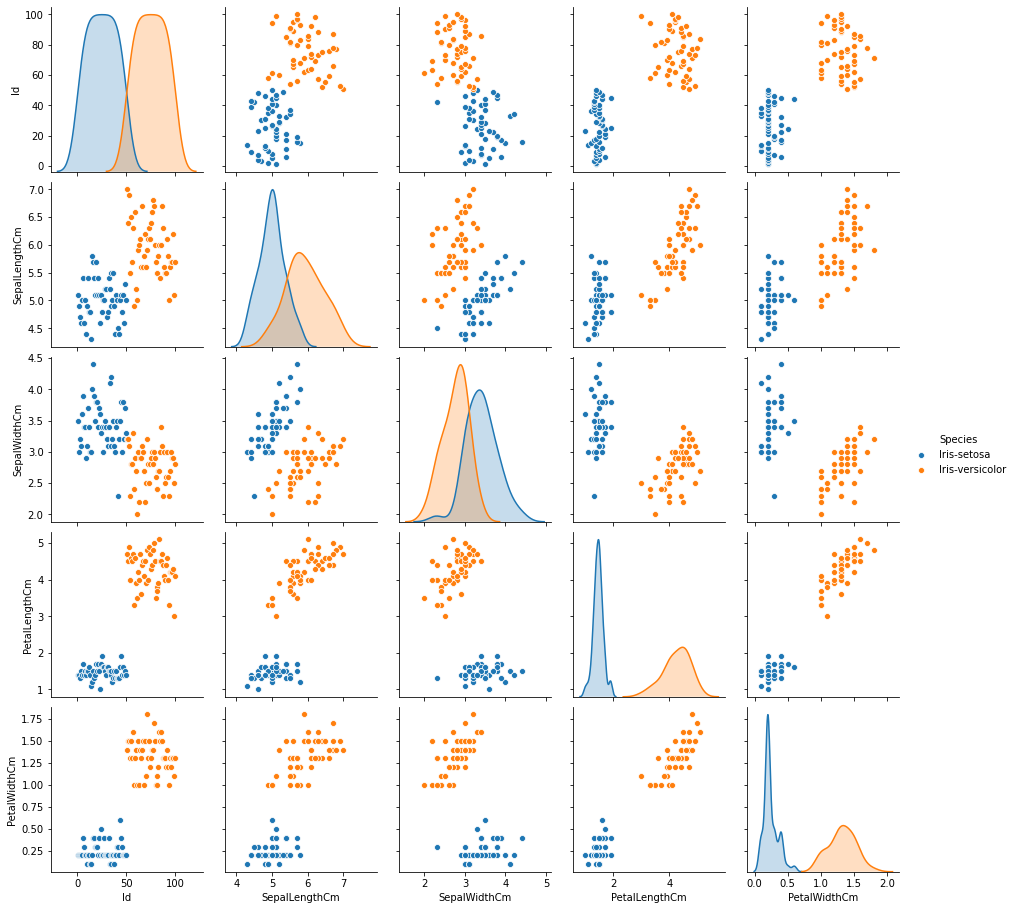

In [26]:
sns.pairplot(final_df, hue = 'Species')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4669e10b8>]],
      dtype=object)

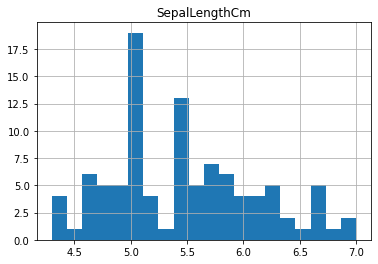

In [27]:
final_df.hist(column = 'SepalLengthCm', bins = 20)

In [ ]:
final_df['Species'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)

In [31]:
final_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [32]:
final_df['Species'].value_counts()

1    50
0    50
Name: Species, dtype: int64

In [37]:
final_df = final_df.drop(final_df.columns[[0]], axis=1)

In [38]:
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
inp_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)
out_df.head()

,Species
0,1
1,1
2,1
3,1
4,1


In [43]:
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)

In [45]:
print(inp_df)

[[-0.5810659   0.85713543 -1.01435952 -1.03824799]
 [-0.89430898 -0.19845007 -1.01435952 -1.03824799]
 [-1.20755205  0.22378413 -1.08374115 -1.03824799]
 [-1.36417359  0.01266703 -0.94497788 -1.03824799]
 [-0.73768744  1.06825253 -1.01435952 -1.03824799]
 [-0.11120129  1.70160383 -0.80621461 -0.68329141]
 [-1.36417359  0.64601833 -1.01435952 -0.8607697 ]
 [-0.73768744  0.64601833 -0.94497788 -1.03824799]
 [-1.67741667 -0.40956718 -1.01435952 -1.03824799]
 [-0.89430898  0.01266703 -0.94497788 -1.21572628]
 [-0.11120129  1.27936963 -0.94497788 -1.03824799]
 [-1.05093052  0.64601833 -0.87559625 -1.03824799]
 [-1.05093052 -0.19845007 -1.01435952 -1.21572628]
 [-1.8340382  -0.19845007 -1.22250442 -1.21572628]
 [ 0.51528486  1.91272093 -1.15312279 -1.03824799]
 [ 0.35866332  2.75718933 -0.94497788 -0.68329141]
 [-0.11120129  1.70160383 -1.08374115 -0.68329141]
 [-0.5810659   0.85713543 -1.01435952 -0.8607697 ]
 [ 0.35866332  1.49048673 -0.80621461 -0.8607697 ]
 [-0.5810659   1.49048673 -0.94

In [46]:
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [49]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train
y_ts_arr = y_test

In [50]:
def weightInitialization(n_features):
  w = np.zeros((1,n_features))
  b = 0
  return w,b

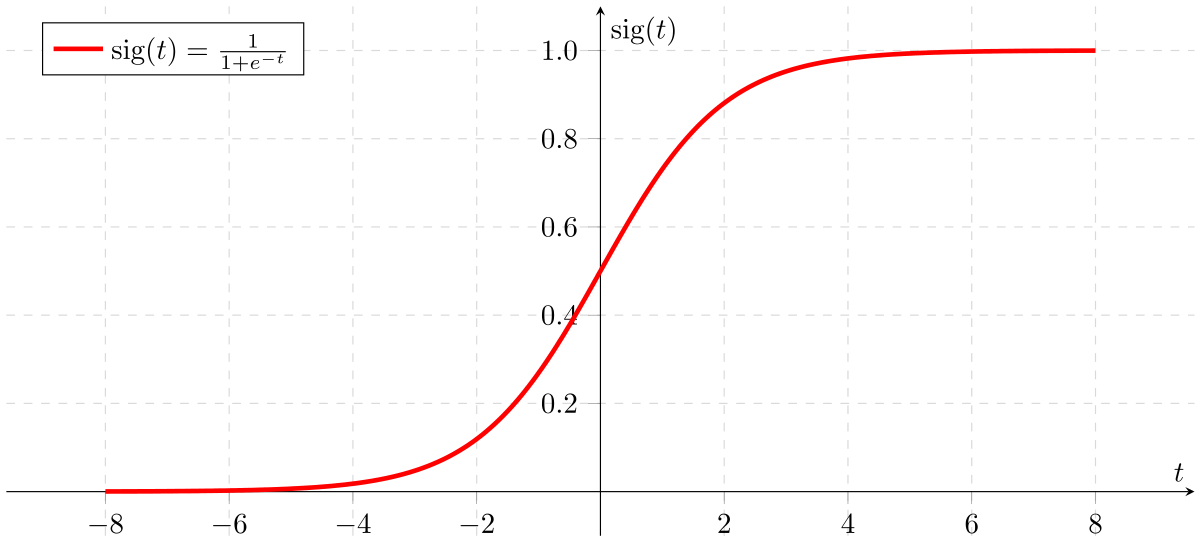

In [51]:
def sigmoid(result):
  return 1/(1+np.exp(-result))

In [ ]:
def model_optimization():